In [2]:
import requests

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
response = requests.get(url)

# Save to CSV
with open("owid-covid-data.csv", "wb") as file:
    file.write(response.content)

print("Download complete.")


Download complete.


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
df.columns

df.isnull().sum().sort_values(ascending=False).head(10)

weekly_icu_admissions                      418442
weekly_icu_admissions_per_million          418442
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
excess_mortality_cumulative_absolute       416024
weekly_hosp_admissions_per_million         404938
weekly_hosp_admissions                     404938
icu_patients                               390319
icu_patients_per_million                   390319
dtype: int64

In [5]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Filter selected countries
countries = ['India', 'Kenya', 'United States']
df_filtered = df[df['location'].isin(countries)].copy()  # copy is safer

# Forward fill missing values
df_filtered = df_filtered.groupby('location').apply(lambda x: x.ffill()).reset_index(drop=True)


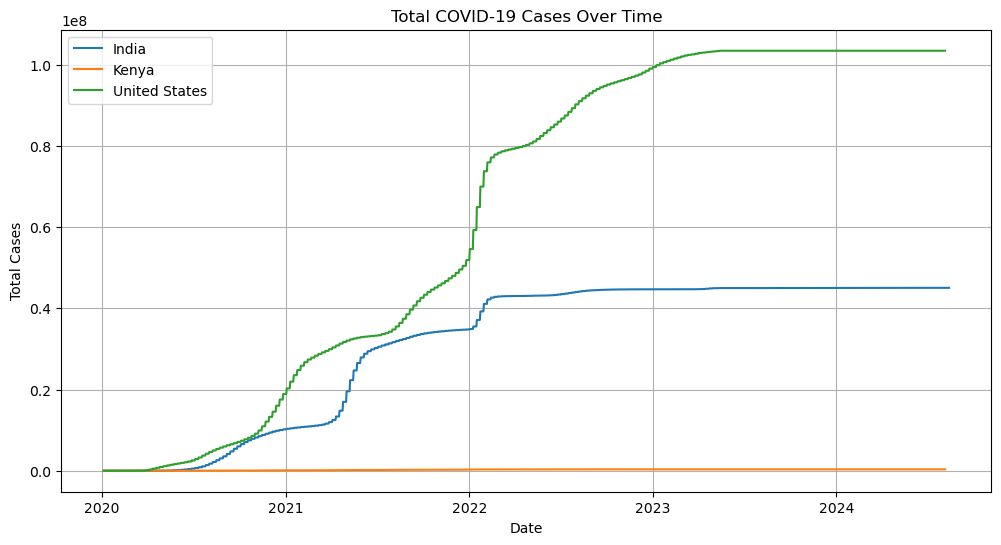

In [9]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()

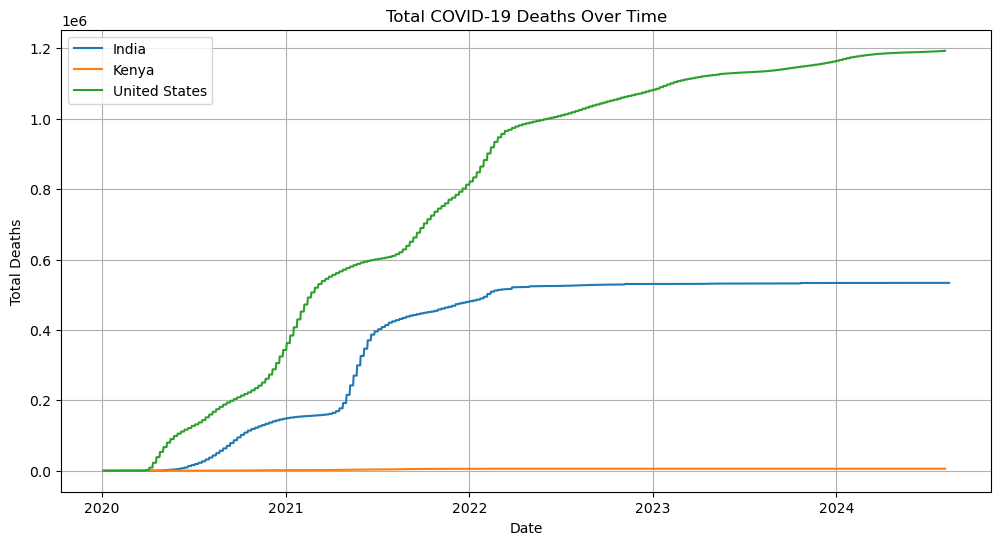

In [10]:
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

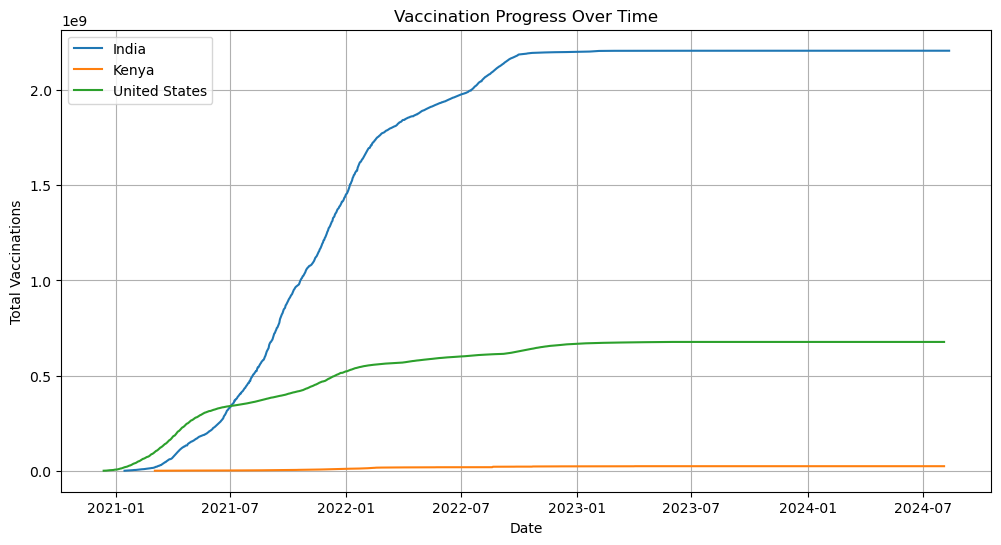

In [11]:
#Vaccination Analysis
plt.figure(figsize=(12,6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('Vaccination Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()

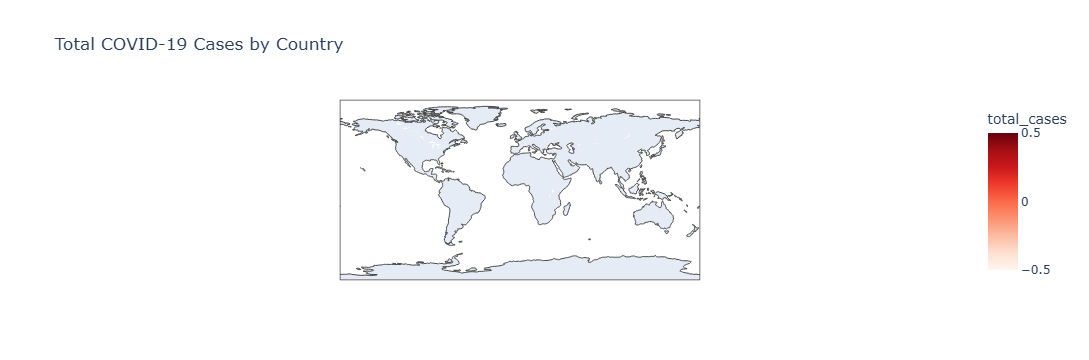

In [15]:
#Global Choropleth Map
import plotly.express as px

latest = df[df['date'] == df['date'].max()]
fig = px.choropleth(latest, locations='iso_code', color='total_cases',
                    hover_name='location',
                    color_continuous_scale='Reds',
                    title='Total COVID-19 Cases by Country')
fig.show()

In [16]:
# Key Findings
print("Key Findings:")
print("- Total COVID-19 cases, deaths, and vaccinations vary significantly across countries.")
print("- India shows a rapid increase in vaccination progress over time.")
print("- The United States has the highest total cases and deaths among the selected countries.")
print("- Kenya has a slower vaccination progress compared to India and the United States.")

Key Findings:
- Total COVID-19 cases, deaths, and vaccinations vary significantly across countries.
- India shows a rapid increase in vaccination progress over time.
- The United States has the highest total cases and deaths among the selected countries.
- Kenya has a slower vaccination progress compared to India and the United States.
